In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [13]:
# Messdaten laden
data_cal1 = np.loadtxt('./data/zeemann_data/Kalibration_01.txt', delimiter=';') # Kalibrierung 1
data_cal2 = np.loadtxt('./data/zeemann_data/Kalibration_02.txt', delimiter=';') # Kalibrierung 2

In [14]:
# Magnetfeldkalibrierung 1
I1 = data_cal1[:, 0]  # Stromstärke in A
I1_abs = np.array([np.abs(a) for a in I1]) #
B1 = data_cal1[:, 1]  # Magnetfeld in mT
# B Fehler: 2%+0.5%*B_max - https://www.leybold-shop.de/physik/geraete/systeme/cassy/sensorboxen-sensoren/physik/5240381.html
# I Fehler: 1.5% - https://www.leybold-shop.de/physik/geraete/systeme/cassy/sensorboxen-sensoren/physik/5240431.html
I1_err = np.array([a*0.015 for a in I1_abs])  # Fehler in A
B1_err = np.array([a*0.02+max(B1)*0.005 for a in B1])  # Fehler in mT
print("Kalibrierung 1:")
print(f"Stromsträrken: {I1_abs}")
print(f"Fehler Stromstärke: {I1_err}")
print(f"Magnetfeld: {B1}")
print(f"Fehler Magnetfeld: {B1_err}")
print("==========================")
# Magnetfeldkalibrierung 2
I2 = data_cal2[:, 0]  # Stromstärke in A
I2_abs = np.array([np.abs(a) for a in I2]) #
B2 = data_cal2[:, 1]  # Magnetfeld in mT
I2_err = np.array([a*0.015 for a in I2_abs])  # Fehler in A 
B2_err = np.array([a*0.02+max(B1)*0.005 for a in B2])  # Fehler in mT
print("Kalibrierung 2:")
print(f"Stromsträrken: {I2_abs}")
print(f"Fehler Stromstärke: {I2_err}")
print(f"Magnetfeld: {B2}")
print(f"Fehler Magnetfeld: {B2_err}")

Kalibrierung 1:
Stromsträrken: [ 0.04  1.12  2.34  3.45  4.61  5.69  6.8   7.74  8.69  9.53 10.11]
Fehler Stromstärke: [0.0006  0.0168  0.0351  0.05175 0.06915 0.08535 0.102   0.1161  0.13035
 0.14295 0.15165]
Magnetfeld: [  3.  73. 150. 221. 294. 362. 421. 460. 488. 509. 523.]
Fehler Magnetfeld: [ 2.675  4.075  5.615  7.035  8.495  9.855 11.035 11.815 12.375 12.795
 13.075]
Kalibrierung 2:
Stromsträrken: [0.05 1.15 2.28 3.32 4.52 5.57 6.61 7.56 8.49 9.37 9.78]
Fehler Stromstärke: [0.00075 0.01725 0.0342  0.0498  0.0678  0.08355 0.09915 0.1134  0.12735
 0.14055 0.1467 ]
Magnetfeld: [  3.  79. 154. 221. 299. 367. 422. 460. 488. 510. 519.]
Fehler Magnetfeld: [ 2.675  4.195  5.695  7.035  8.595  9.955 11.055 11.815 12.375 12.815
 12.995]


Kalibrierung 1 Fitparameter: a=-0.29830696464000245, b=2.0901573743395794, c=60.78183088744345, d=0.9270451998103557
Kalibrierung 2 Fitparameter: a=-0.2965653120060276, b=1.6196298246137566, c=65.44571368762347, d=0.09922205958367927
======Dataframes und Latex======
     Kalibrierung         a     a_err         b     b_err          c  \
0  Kalibrierung 1 -0.298307  0.093500  2.090157  1.265280  60.781831   
1  Kalibrierung 2 -0.296565  0.102401  1.619630  1.348625  65.445714   

      c_err         d     d_err  
0  4.207754  0.927045  2.697581  
1  4.362331  0.099222  2.734834  
\begin{tabular}{lrrrrrrrr}
\toprule
Kalibrierung & a & a_err & b & b_err & c & c_err & d & d_err \\
\midrule
Kalibrierung 1 & -0.298 & 0.094 & 2.090 & 1.265 & 60.782 & 4.208 & 0.927 & 2.698 \\
Kalibrierung 2 & -0.297 & 0.102 & 1.620 & 1.349 & 65.446 & 4.362 & 0.099 & 2.735 \\
\bottomrule
\end{tabular}

======Plots und Fits======


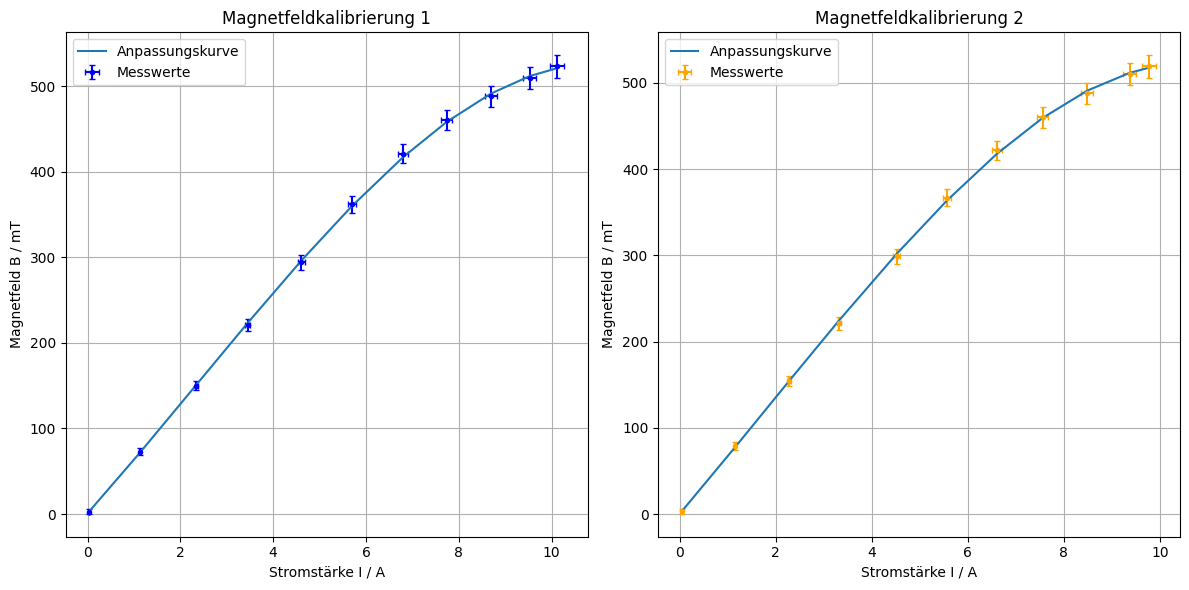

popt_new = array([-0.29743614,  1.8548936 , 63.11377229,  0.51313363])
pcov_new = array([[ 9.61412109e-03, -1.25903006e-01,  3.66159077e-01,
        -9.36009482e-02],
       [-1.25903006e-01,  1.70986229e+00, -5.28784968e+00,
         1.52139259e+00],
       [ 3.66159077e-01, -5.28784968e+00,  1.83675657e+01,
        -6.84242492e+00],
       [-9.36009482e-02,  1.52139259e+00, -6.84242492e+00,
         7.37813128e+00]])
----------------
popt1 = array([-0.29830696,  2.09015737, 60.78183089,  0.9270452 ])
pcov1 = array([[ 8.74232606e-03, -1.16166037e-01,  3.42851277e-01,
        -8.82863281e-02],
       [-1.16166037e-01,  1.60093394e+00, -5.02420338e+00,
         1.45658309e+00],
       [ 3.42851277e-01, -5.02420338e+00,  1.77051957e+01,
        -6.64971559e+00],
       [-8.82863281e-02,  1.45658309e+00, -6.64971559e+00,
         7.27694469e+00]])
popt2 = array([-0.29656531,  1.61962982, 65.44571369,  0.09922206])
pcov2 = array([[ 1.04859161e-02, -1.35639975e-01,  3.89466876e-01,
        

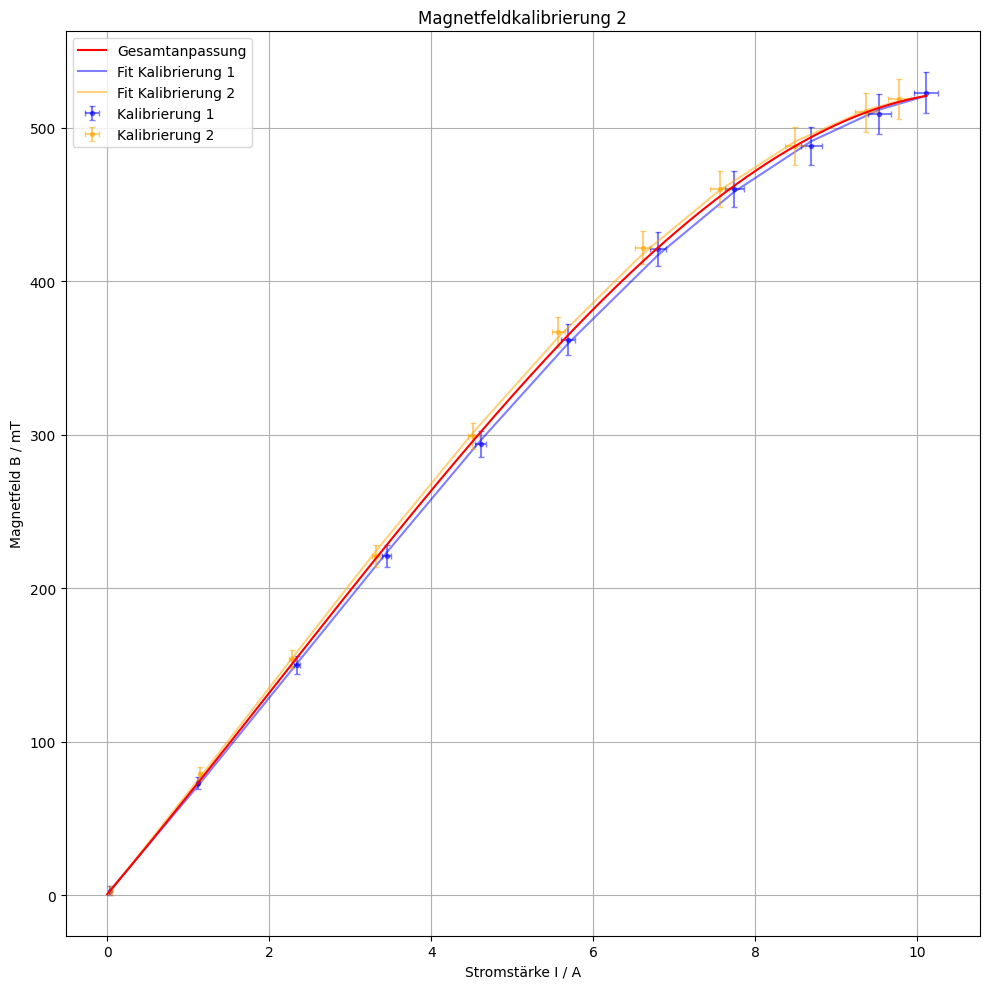

In [15]:
# Plot und Fit
# Polynom 3. Grades
def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d
# Fit Kalibrierung 1
x_arr1 = I1_abs
y_arr1 = B1
x_err1 = I1_err
y_err1 = B1_err
popt1, pcov1 = curve_fit(func, x_arr1, y_arr1, sigma=y_err1, absolute_sigma=True)
a1, b1, c1, d1 = popt1
print(f"Kalibrierung 1 Fitparameter: a={a1}, b={b1}, c={c1}, d={d1}")
# Fit Kalibrierung 2
x_arr2 = I2_abs
y_arr2 = B2
x_err2 = I2_err
y_err2 = B2_err
popt2, pcov2 = curve_fit(func, x_arr2, y_arr2, sigma=y_err2, absolute_sigma=True)
a2, b2, c2, d2 = popt2
print(f"Kalibrierung 2 Fitparameter: a={a2}, b={b2}, c={c2}, d={d2}")
# Fitparameter in DataFrame speichern
print("======Dataframes und Latex======")
df = pd.DataFrame({
    'Kalibrierung': ['Kalibrierung 1', 'Kalibrierung 2'],
    'a': [a1, a2],
    'a_err': [np.sqrt(pcov1[0][0]), np.sqrt(pcov2[0][0])],
    'b': [b1, b2],
    'b_err': [np.sqrt(pcov1[1][1]), np.sqrt(pcov2[1][1])],
    'c': [c1, c2],
    'c_err': [np.sqrt(pcov1[2][2]), np.sqrt(pcov2[2][2])],
    'd': [d1, d2],
    'd_err': [np.sqrt(pcov1[3][3]), np.sqrt(pcov2[3][3])],
})
print(df)
# Latex Tabelle
latex_table = df.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table)	


print("======Plots und Fits======")
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot Kalibrierung 1
ax[0].errorbar(I1_abs, B1, xerr=I1_err, yerr=B1_err, fmt='.', label='Messwerte', color='blue', capsize=2)
ax[0].plot(x_arr1, func(x_arr1, *popt1), '-', label='Anpassungskurve')
ax[0].set_xlabel('Stromstärke I / A')
ax[0].set_ylabel('Magnetfeld B / mT')
ax[0].set_title('Magnetfeldkalibrierung 1')
ax[0].legend()
ax[0].grid()
# Plot Kalibrierung 2
ax[1].errorbar(I2_abs, B2, xerr=I2_err, yerr=B2_err, fmt='.', label='Messwerte', color='orange', capsize=2)
ax[1].plot(x_arr2, func(x_arr2, *popt2), '-', label='Anpassungskurve')
ax[1].set_xlabel('Stromstärke I / A')
ax[1].set_ylabel('Magnetfeld B / mT')
ax[1].set_title('Magnetfeldkalibrierung 2')
ax[1].legend()
ax[1].grid()
plt.tight_layout()
plt.savefig('plots/zeeman_plt/zeeman_pltKalibrierung_1_2.png', dpi=300)
plt.show()

# Plot und Fit mit Gesamtanpassung
x_bar = np.linspace(0, max(I1_abs), 1000)
y_bar = (func(x_bar, *popt1) + func(x_bar, *popt2))/2
popt_new = (popt1 + popt2) / 2
pcov_new = (pcov1 + pcov2) / 2
print(f'{popt_new = }')
print(f'{pcov_new = }')
print('----------------')
print(f'{popt1 = }')
print(f'{pcov1 = }')
print(f'{popt2 = }')
print(f'{pcov2 = }')
print("======Gesamtanpassung======")
print(f"Gesamtanpassung Fitparameter: a={popt_new[0]}, b={popt_new[1]}, c={popt_new[2]}, d={popt_new[3]}")
print(f"Gesamtanpassung Fitparameter Fehler: a={np.sqrt(pcov_new[0][0])}, b={np.sqrt(pcov_new[1][1])}, c={np.sqrt(pcov_new[2][2])}, d={np.sqrt(pcov_new[3][3])}")
# Gesamtanpassung in DataFrame speichern
df_total = pd.DataFrame({
    'Gesamtanpassung': ['Gesamtanpassung'],
    'a': [popt_new[0]],
    'a_err': [np.sqrt(pcov_new[0][0])],
    'b': [popt_new[1]],
    'b_err': [np.sqrt(pcov_new[1][1])],
    'c': [popt_new[2]],
    'c_err': [np.sqrt(pcov_new[2][2])],
    'd': [popt_new[3]],
    'd_err': [np.sqrt(pcov_new[3][3])],
})
print(df_total)
# Latex Tabelle Gesamtanpassung
latex_table_total = df_total.to_latex(index=False, float_format="%.3f", escape=False)
print(latex_table_total)
# Plot mit Gesamtanpassung

plt.figure(figsize=(10, 10))
plt.plot(x_bar, y_bar, '-', label='Gesamtanpassung', color='red', zorder=3)
plt.errorbar(I1_abs, B1, xerr=I1_err, yerr=B1_err, fmt='.', label='Kalibrierung 1',color='blue', capsize=2, alpha=0.5)
plt.plot(x_arr1, func(x_arr1, *popt1), '-', label='Fit Kalibrierung 1', color='blue', alpha=0.5)
# Plot Kalibrierung 2
plt.errorbar(I2_abs, B2, xerr=I2_err, yerr=B2_err, fmt='.', label='Kalibrierung 2', color='orange', capsize=2, alpha=0.5)
plt.plot(x_arr2, func(x_arr2, *popt2), '-', label='Fit Kalibrierung 2', color='orange', alpha=0.5)
plt.xlabel('Stromstärke I / A')
plt.ylabel('Magnetfeld B / mT')
plt.title('Magnetfeldkalibrierung 2')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('plots/zeeman_plt/zeeman_pltKalibrierung_gesamt.png', dpi=300)
plt.show()



In [16]:
I = np.array([1.7, 4.7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) # Beispielwerte für I
def dI_new(I, bla):
    return 0.02*func(I[bla], *popt_new) + 0.005
for i in range(len(I)):
    print(fr'B-Feld für {I[i]} A: ' '%5.5f' % func(I[i], *popt_new), 'mT +/- ', '%5.5f' % dI_new(I, i))

B-Feld für 1.7 A: 111.70589 mT +/-  2.23912
B-Feld für 4.7 A: 307.24175 mT +/-  6.14984
B-Feld für 1.0 A: 65.18436 mT +/-  1.30869
B-Feld für 2.0 A: 131.78076 mT +/-  2.64062
B-Feld für 3.0 A: 198.51772 mT +/-  3.97535
B-Feld für 4.0 A: 263.61061 mT +/-  5.27721
B-Feld für 5.0 A: 325.27482 mT +/-  6.51050
B-Feld für 6.0 A: 381.72573 mT +/-  7.63951
B-Feld für 7.0 A: 431.17873 mT +/-  8.62857
B-Feld für 8.0 A: 471.84920 mT +/-  9.44198
B-Feld für 9.0 A: 501.95252 mT +/-  10.04405
B-Feld für 10.0 A: 519.70408 mT +/-  10.39908


---------------Geradenfit----------------
List Works
x_strich = np.float64(461.2820514)
y_strich = np.float64(6.5616264e-24)
x2_strich =np.float64(215263.99149872223)
xy_strich = np.float64(3.052547942371796e-21)
----------------------------------------------------------------------------
Steigung: m = np.float64(1.0386187822024674e-26)
y-Achsenabschnitt: b = np.float64(1.7706643752307167e-24)
Fehler Steigung: dm = np.float64(1.778037772452472e-27)
Fehler y-Achsenabschnitt db = np.float64(8.249481962026594e-25)
----------------------------------------------------------------------------
----------------------------------------------------------------------------


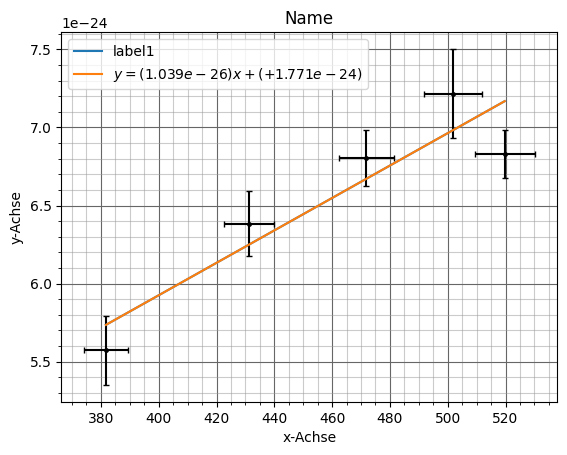

---------------Geradenfit----------------
List Works
x_strich = np.float64(461.2820514)
y_strich = np.float64(1.4199302000000002e-23)
x2_strich =np.float64(215263.99149872223)
xy_strich = np.float64(6.6094661191288385e-21)
----------------------------------------------------------------------------
Steigung: m = np.float64(2.3997708611708356e-26)
y-Achsenabschnitt: b = np.float64(3.1295897426915958e-24)
Fehler Steigung: dm = np.float64(1.9844619556002404e-27)
Fehler y-Achsenabschnitt db = np.float64(9.207218969522653e-25)
----------------------------------------------------------------------------
----------------------------------------------------------------------------


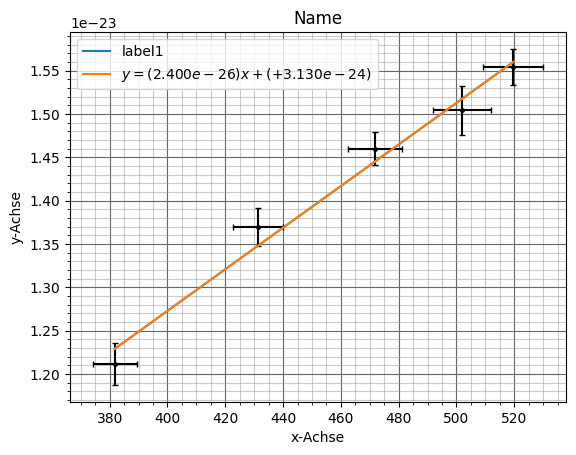

=======Bohr==========
etot = array([9.73100038e-24, 2.44282034e-23])
etot_err = array([1.61067130e-12, 1.36486693e-12])
{ 1.828548479177519e-23 (1.4726002909774376e-12) } {\J \per \T}


In [17]:
import numpy as np
import matplotlib.pyplot as plt

B = np.array([381.725731, 431.178730, 471.849199, 501.952520, 519.704077])
B_err = np.array([7.639515, 8.628575, 9.441984, 10.044050, 10.399082])

E_plus = np.array([5.572476e-24, 6.384634e-24, 6.803517e-24, 7.217159e-24, 6.830346e-24])
E_plus_err = np.array([2.217525e-25, 2.086674e-25, 1.809059e-25, 2.860610e-25, 1.555668e-25])

E_minus = np.array([1.211530e-23, 1.369720e-23, 1.459912e-23, 1.504136e-23, 1.554353e-23])
E_minus_err = np.array([2.410784e-25, 2.167118e-25, 1.881750e-25, 2.848715e-25, 2.075650e-25])

def geradenfit(x, y, x_err, y_err):
    print('---------------Geradenfit----------------')
    # Mittelwert
    def mittel(x, n):
        return (1 / n) * np.sum(x)

    # varianzgewichteter Mittelwert
    def mittel_var(val, z):
        return np.sum(z / (val ** 2)) / np.sum(1 / (val ** 2))

    # varianzgemittelte Standardabweichung
    def sigma(val, n):
        return n / (np.sum(1 / val ** 2))

    # gerade
    def polynom(m, b, x):
        return m * x + b

    if len(x)==len(y):
        n = len(x)
        print('List Works')
    else:
        print('x and y are not the same length')

    x_strich = mittel(x, n)
    x2_strich = mittel(x ** 2, n)
    y_strich = mittel(y, n)
    xy_strich = mittel(x * y, n)
    print(f'{x_strich = }')
    print(f'{y_strich = }')
    print(f'{x2_strich =}')
    print(f'{xy_strich = }')
    print('----------------------------------------------------------------------------')
    m = (xy_strich - (x_strich * y_strich)) / (x2_strich - x_strich ** 2)
    b = (x2_strich * y_strich - x_strich * xy_strich) / (x2_strich - x_strich ** 2)
    print(f'Steigung: {m = }')
    print(f'y-Achsenabschnitt: {b = }')

    sigmax = sigma(x_err, n)
    sigmay = sigma(y_err, n)

    dm = np.sqrt(sigmay / (n * (x2_strich - x_strich ** 2)))
    db = np.sqrt(sigmay * x2_strich / (n * (x2_strich - (x_strich ** 2))))
    print(f'Fehler Steigung: {dm = }')
    print(f'Fehler y-Achsenabschnitt {db = }')
    print('----------------------------------------------------------------------------')
    # create dictionary for further calculations
    dict = {
        'm':m,
        'b':b,
        'dm':dm,
        'db':db,
    }

    # plot
    print('----------------------------------------------------------------------------')
    fig, ax = plt.subplots()
    ax.set_title('Name')
    ax.set_ylabel(r'y-Achse')
    ax.set_xlabel(r'x-Achse')
    ax.errorbar(x, y, xerr=x_err, yerr=y_err, capsize=2, fmt='.', markersize=5, color='black')
    ax.plot(x, polynom(m,b,x), label ='label1')
    ax.plot(x, m * x + b, label=f'$y = ({m:0.3e})x+({b:+0.3e})$')
    plt.legend()
    plt.grid(visible=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.5)
    plt.show()
    return dict
geradenfit(B, E_plus, B_err, E_plus_err)
geradenfit(B, E_minus, B_err, E_minus_err)

print('=======Bohr==========')
def mittel_var(z, sigma):
    return np.sum(z/sigma**2)/np.sum(1/sigma**2)

def sigma2(n, sigma):
    return n/(np.sum(1/sigma**2))

#etot = np.array([1.0386187822024674e-26, 2.3997708611708356e-26])
#etot_err = np.array([1.778037772452472e-27, 1.9844619556002404e-27])
etot = np.array([9.73100038e-24, 2.44282034e-23])
etot_err = np.array([1.61067130e-12, 1.36486693e-12])

bohr = mittel_var(etot, etot_err)
bohr_err = np.sqrt(sigma2(len(etot), etot_err))

print(f'{etot = }')
print(f'{etot_err = }')
print('====================')
bohrfit = mittel_var(etot, etot_err)
bohrfit_err = np.sqrt(sigma2(len(etot), etot_err))
print('{', f'{bohrfit} ({bohrfit_err})', '}', '{\J \per \T}')